# Introduction

In statistics, a **sample of data** represents a small portion of observations taken from a larger population. This population consists of all possible observations within a specific domain or those generated by a particular process.

- What's intriguing is that many of these observations tend to follow a common pattern known as the **normal distribution**, or more formally, the **Gaussian distribution**.



# Understanding the Gaussian Distribution



When we talk about the **distribution of data**, we're essentially describing the shape it takes when we visualize it, often using methods like histograms.
- One of the most common and well-known distributions for continuous values is the **bell curve**, formally known as the **normal distribution** or the **Gaussian distribution**, named after Carl Friedrich Gauss.

- **Gaussian Distribution**: The Gaussian distribution is a specific pattern that a lot of data naturally falls into. You might encounter references to data being "normally distributed" or "Gaussian," and these terms are interchangeable, both referring to the same thing: data that looks like the Gaussian distribution.

- Some real-world observations that often follow a Gaussian distribution include:

  - People's heights.
  - IQ scores.
  - Body temperature.

---





# Visualizing the Gaussian Distribution

Let's take a look at an idealized Gaussian distribution using some code:

- Running this code generates a plot of an idealized Gaussian distribution.
- The x-axis represents different observations, while the y-axis indicates the likelihood of each observation.
- In this case, observations around 0.0 are the most common, while those around -3.0 and 3.0 are rare or unlikely. This is technically referred to as a **probability density function**.

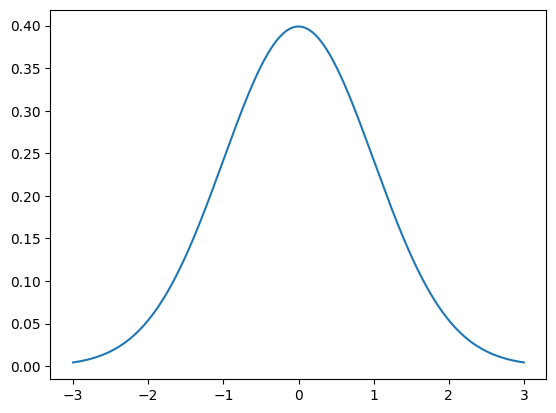

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm

# x-axis for the plot
x_axis = arange(-3, 3, 0.001)

# y-axis as the Gaussian
y_axis = norm.pdf(x_axis, 0, 1)

# plot data
pyplot.plot(x_axis, y_axis)
pyplot.show()



- When data follows a Gaussian distribution or assuming that it follows Gaussian distribution is useful for calculations because it's a well-understood distribution.

- Large portions of statistics are dedicated to methods for this distribution. Fortunately, much of the data we work with in machine learning often fits a Gaussian distribution. For instance, input data for model fitting and model evaluations on different training data samples.

- However, not all data is Gaussian. It's essential to identify whether data fits this distribution by reviewing histogram plots or using statistical tests. Some observations that don't fit a Gaussian distribution and may follow a different shape include:

  - People's incomes.
  - City populations.
  - Sales of books.

- Additionally, there's another common distribution known as the **uniform distribution**, characterized by a flat line graph, often seen when each item or value has an equal chance of being selected.

# Sample vs Population

- We can think of data being generated by some unknown process. The data that we collect is called a *data sample*, whereas all possible data that could be collected is called the *population*.

  - **Data Sample**: A subset of observations from a group.
  - **Data Population**: All possible observations from a group.

- This is an important distinction because different statistical methods are used on samples vs populations, and in applied machine learning, we are often working with samples of data. If you read or use the word *population* when talking about data in machine learning, it very likely means *sample* when it comes to statistical methods.

- Two examples of data samples that you will encounter in machine learning include:

  - The train and test datasets.
  - The performance scores for a model.

- When using statistical methods, we often want to make claims about the population using only observations in the sample. Two clear examples of this include:

  - The training sample must be representative of the population of observations so that we can fit a useful model.
  - The test sample must be representative of the population of observations so that we can develop an unbiased evaluation of the model skill.

- Because we are working with samples and making claims about a population, it means that there is always some uncertainty, and it is important to understand and report this uncertainty.

# Test Dataset

- Before we explore some important summary statistics for data with a Gaussian distribution, let's first generate a sample of data that we can work with.
- We can use the `randn()` NumPy function to generate a sample of random numbers drawn from a Gaussian distribution. There are two key parameters that define any Gaussian distribution;
  - They are the **mean** and the **standard deviation**. We will go more into these parameters later as they are also key statistics to estimate when we have data drawn from an unknown Gaussian distribution.

  - The `randn()` function will generate a specified number of random numbers (e.g., 10,000) drawn from a Gaussian distribution with a mean of zero and a standard deviation of 1.
  - We can then scale these numbers to a Gaussian of our choosing by rescaling the numbers. This can be made consistent by adding the desired mean (e.g., 50) and multiplying the value by the standard deviation (5). Note, generating random numbers is covered in greater detail in Chapter 6.

    ```python
    data = 5 * randn(10000) + 50
    ```





## Plotting the Dataset

We can then plot the dataset using a histogram and look for the expected shape of the plotted data. The complete example is listed below.

- Running the example generates the dataset and plots it as a histogram. Simple plotting is covered in Chapter 5.
- We can almost see the Gaussian shape in the data, but it appears blocky. This highlights an important point.
  - Sometimes, the data will not be a perfect Gaussian, but it will have a Gaussian-like distribution.
  - It is almost Gaussian and may be more Gaussian if plotted differently, scaled, or with more data.
  - Often, when working with Gaussian-like data, we can treat it as Gaussian and use all of the same statistical tools to get reliable results.


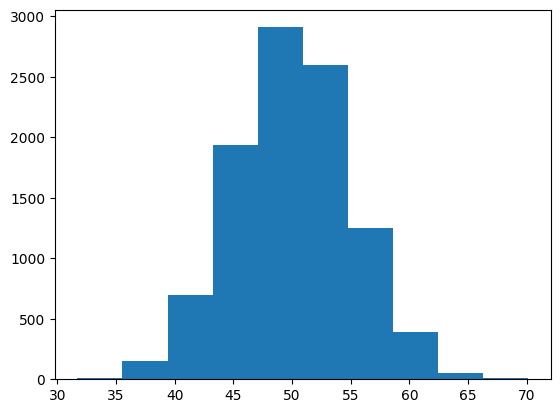

In [ ]:
# generate a sample of random gaussians
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# histogram of generated data
pyplot.hist(data)
pyplot.show()

## Improved Plot

In the case of this dataset, we do have enough data, and the plot is blocky because the plotting function chooses an arbitrary-sized bucket for splitting up the data.
- We can choose a different, more granular way to split up the data and better expose the underlying Gaussian distribution. The updated example with the more refined plot is listed below.

- Running the example, we can see that choosing 100 splits of the data does a much better job of creating a plot that clearly shows the Gaussian distribution of the data.
- The dataset was generated from a perfect Gaussian, but the numbers were randomly chosen, and we only chose 10,000 observations for our sample.
- You can see, even with this controlled setup, there is obvious noise in the data sample. This highlights another important point:
  - We should always expect some noise or limitation in our data sample.
  - The data sample will always contain errors compared to the pure underlying distribution.

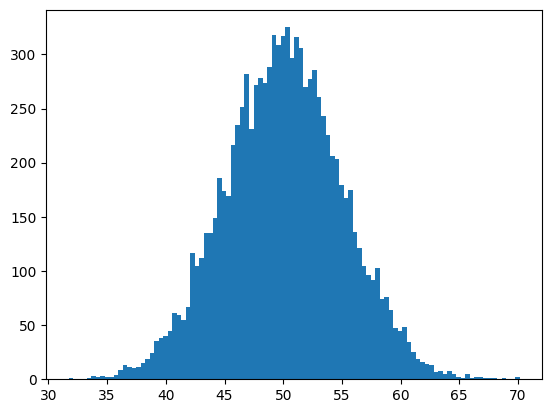

In [ ]:
# generate a sample of random gaussians
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(10000) + 50

# histogram of generated data with more bins
pyplot.hist(data, bins=100)
pyplot.show()

# Central Tendency

The central tendency of a distribution refers to the middle or typical value in the distribution, often representing the most common or most likely value.

- In the Gaussian distribution, the central tendency is called the *mean*, or more formally, the *arithmetic mean*, and is one of the two main parameters that defines any Gaussian distribution.

- The mean of a sample is calculated as the sum of the observations divided by the total number of observations in the sample.

- The mean can be expressed as: $ \ {mean}(x) = \frac{1}{n} \sum_{i=1}^n x_i $

  - Where:
    - $x_i$ is the $ith$ observation from the dataset.
    - $n$ is the total number of observations.

- The notation for the population mean is the Greek lowercase letter mu (μ), while the notation for the sample mean is the variable with a bar above, such as x-bar (x̄).

- You can calculate the mean of a sample using the `mean()` NumPy function on an array.

    ```python
    result = mean(data)
    ```

- The example below demonstrates this on the test dataset developed in the previous section.

    ```python
    # calculate the mean of a sample
    from numpy.random import seed
    from numpy.random import randn
    from numpy import mean

    # seed the random number generator
    seed(1)

    # generate univariate observations
    data = 5 * randn(10000) + 50

    # calculate mean
    result = mean(data)
    print('Mean: %.3f' % result)
    ```


- Running the example calculates and prints the mean of the sample.

  - This calculation of the arithmetic mean of the sample is an estimate of the parameter of the underlying Gaussian distribution of the population from which the sample was drawn.

  - As an estimate, it will contain errors. Because we know the underlying distribution has a true mean of 50, we can see that the estimate from a sample of 10,000 observations is reasonably accurate.

    ```
    Mean: 50.049
    ```

- The mean is easily influenced by outlier values, which are rare values far from the mean.
  - These outliers may be legitimately rare observations on the edge of the distribution or errors.
  - Further, the mean may be misleading when calculating it for distributions other than Gaussian, such as a uniform distribution or power distribution, as it may refer to a seemingly arbitrary expected value rather than the true central tendency of the distribution.

- In the case of outliers or a non-Gaussian distribution, an alternate and commonly used central tendency to calculate is the *median*.
  - The median is calculated by first sorting all data and then locating the middle value in the sample.
  - This is straightforward if there is an odd number of observations. If there is an even number of observations, the median is calculated as the average of the middle two observations.
  - You can calculate the median of a sample using the `median()` NumPy function.

    ```python
    result = median(data)
    ```

  - The example below demonstrates this on the test dataset.

    ```python
    # calculate the median of a sample
    from numpy.random import seed
    from numpy.random import randn
    from numpy import median

    # seed the random number generator
    seed(1)

    # generate univariate observations
    data = 5 * randn(10000) + 50

    # calculate median
    result = median(data)
    print('Median: %.3f' % result)
    ```

  - Running the example, we can see that the median is calculated from the sample and printed.
    - The result is not too dissimilar from the mean because the sample has a Gaussian distribution.
    - If the data had a different (non-Gaussian) distribution, the median may be very different from the mean and perhaps a better reflection of the central tendency of the underlying population.

      ```
      Median: 50.042
      ```

# Variance

The variance of a distribution refers to how much, on average, observations vary or differ from the mean value.
- It is useful to think of the variance as a measure of the spread of a distribution.
- A low variance will have values grouped closely around the mean (e.g., a narrow bell shape), whereas a high variance will have values spread out from the mean (e.g., a wide bell shape).

- This concept can be demonstrated with an example by plotting idealized Gaussians with low and high variance. The complete example is listed below.

- Running the example plots two idealized Gaussian distributions: the blue one with low variance, grouped around the mean, and the orange one with higher variance, indicating more spread.



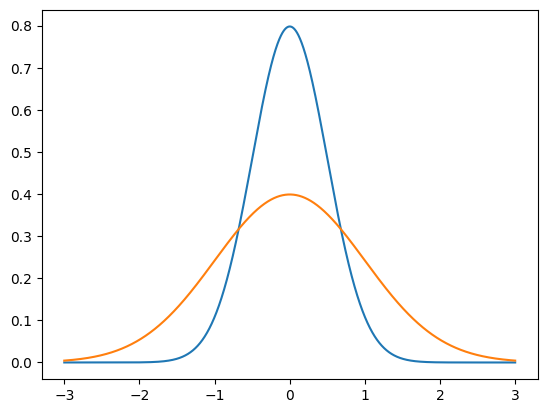

In [1]:
    # generate and plot Gaussians with different variances
    from numpy import arange
    from matplotlib import pyplot
    from scipy.stats import norm

    # x-axis for the plot
    x_axis = arange(-3, 3, 0.001)

    # plot low variance
    pyplot.plot(x_axis, norm.pdf(x_axis, 0, 0.5))

    # plot high variance
    pyplot.plot(x_axis, norm.pdf(x_axis, 0, 1))
    pyplot.show()

## Variance Calculation

- The variance of a data sample drawn from a Gaussian distribution is calculated as the average squared difference of each observation in the sample from the sample mean. It can be expressed as:

  - $ {variance}(x) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \text{mean}(x))^2 $

    Where:
    - Variance is often denoted as $s^2$ or the lowercase Greek letter sigma $sigma^2$, indicating the squared units of the measure.
    - The equation with $(n-1)$ in the denominator is used for calculating the variance of a sample, not the entire population.

- We can calculate the variance of a data sample in NumPy using the `var()` function. The example below demonstrates calculating the variance on the test dataset.

    ```python
    # calculate the variance of a sample
    from numpy.random import seed
    from numpy.random import randn
    from numpy import var

    # seed the random number generator
    seed(1)

    # generate univariate observations
    data = 5 * randn(10000) + 50

    # calculate variance
    result = var(data)
    print('Variance: %.3f' % result)
    ```


- Running the example calculates and prints the variance.

    ```
    Variance: 24.939
    ```



- It can be challenging to interpret variance because the units are in squared units of the observations.
  - To return the units to the original units of the observations, you can take the square root of the result. This square root of the variance is known as the *standard deviation*, which, along with the mean, are the two key parameters required to specify any Gaussian distribution.

  - We can see that the value of 4.9 is very close to the value of 5 for the standard deviation specified when the samples were created for the test problem.

  - We can wrap the variance calculation in a square root to calculate the standard deviation directly. Alternatively, you can calculate standard deviation as:
    - $ {stdev}(x) = \sqrt{\text{variance}(x)}\ $

    Where:
      - The standard deviation is often written as \(s\) or as the Greek lowercase letter sigma (\(\sigma\)).

- The standard deviation can be calculated directly in NumPy for an array using the `std()` function. The example below demonstrates the calculation of the standard deviation on the test problem.

    ```python
    # calculate the standard deviation of a sample
    from numpy.random import seed
    from numpy.random import randn
    from numpy import std

    # seed the random number generator
    seed(1)

    # generate univariate observations
    data = 5 * randn(10000) + 50

    # calculate standard deviation
    result = std(data)
    print('Standard Deviation: %.3f' % result)
    ```



- Running the example calculates and prints the standard deviation of the sample. The value matches the square root of the variance and is very close to 5.0, the value specified in the definition of the problem.

    ```
    Standard Deviation: 4.994
    ```
---


# Describing a Gaussian

- In applied machine learning, you will often need to report the results of an algorithm, which involves reporting the estimated skill of the model on out-of-sample data.
  - Typically, this is done by reporting the mean performance resulting from a k-fold cross-validation or some other repeated sampling procedure.
  - When reporting model skill, you are effectively summarizing the distribution of skill scores, and it's highly likely that the skill scores will follow a Gaussian distribution.

- It is common practice to report only the mean performance of the model. However, doing so hides two other important details regarding the distribution of the model's skill:

  1. The two parameters of the Gaussian distribution of model scores.
  2. The size of the sample.

- Ideally, it would also be a good practice to confirm that the model's skill scores indeed follow a Gaussian distribution or look Gaussian enough to justify reporting the parameters of the Gaussian distribution.
  - This is crucial because readers may reconstruct the distribution of skill scores and potentially compare them to the skill of models on the same problem in the future.

---


# Summary

In this tutorial, you discovered the Gaussian distribution, how to identify it, and how to calculate key summary statistics of data drawn from this distribution. Specifically, you learned:

- That the Gaussian distribution describes many observations, including many observations seen during applied machine learning.
- That the central tendency of a distribution is the most likely observation and can be estimated from a sample of data as the mean or median.
- That the variance is the average deviation from the mean in a distribution and can be estimated from a sample of data as the variance and standard deviation.

---

# Further Reading

## APIs

- [scipy.stats.norm API](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
- [numpy.random.seed API](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html)
- [numpy.random.randn API](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html)
- [matplotlib.pyplot.hist API](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)
- [numpy.mean API](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
- [numpy.median API](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html)
- [numpy.var API](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)
- [numpy.std API](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)

---

## Articles

- [Normal distribution on Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)
- [Central tendency on Wikipedia](https://en.wikipedia.org/wiki/Central_tendency)
- [Arithmetic mean on Wikipedia](https://en.wikipedia.org/wiki/Arithmetic_mean)
- [Median on Wikipedia](https://en.wikipedia.org/wiki/Median)
- [Variance on Wikipedia](https://en.wikipedia.org/wiki/Variance)
- [Standard deviation on Wikipedia](https://en.wikipedia.org/wiki/Standard_deviation)

---